In [496]:
from bowzer import train

In [501]:
Bowzer = train.BowzerClassifier(resize_n=128)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.117904..2.5528543].


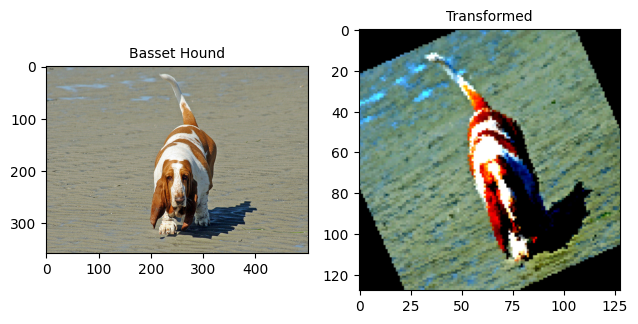

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.117904..2.64].


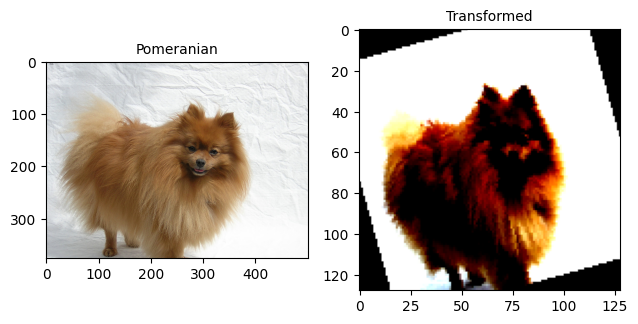

In [502]:
Bowzer.view_sample_transformations(['Pomeranian', 'Basset Hound'])

In [495]:
performance = Bowzer.train_eval(epochs=10)

Model Results will be saved to : /Volumes/KCQDrive/projects/bowzer/runs/trainer_20241018


EPOCH 1:
loss: 3.622990  [   64/ 3680]


KeyboardInterrupt: 

In [48]:
from bowzer.utils import show_image

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.0836544..2.64].


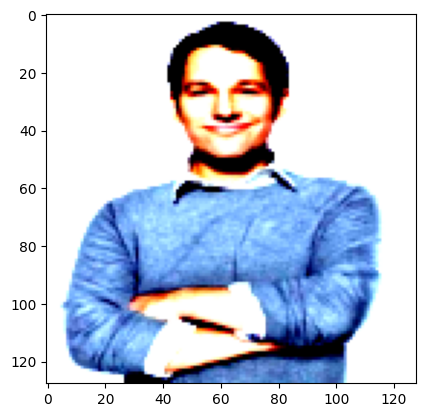

In [64]:
# Load and transform image
#jason_segel = Image.open("/Users/kristinaqualben/Downloads/jason-segel.jpeg")
jason_segel = "/Users/kristinaqualben/Downloads/jason-segel.jpeg"
target = 'paul_rudd' #'paul_rudd' 'puggle' 'jason_segel'
image_path =  f"/Volumes/KCQDrive/projects/images/{target}.jpg"
show_image(image_path, data_module.test_transforms)

In [65]:
from PIL import Image
import torch
pred_image = Image.open(image_path)
pred_image_tensor = data_module.test_transforms(pred_image)
pred_image_tensor_reshaped = pred_image_tensor.unsqueeze(0)

net.eval()
with torch.no_grad():
    pred = net(pred_image_tensor_reshaped).squeeze(0)
pred_cls = pred.softmax(0)
cls_id = pred_cls.argmax().item()


In [70]:
#import pandas as pd
dog_matches = {k: pred_cls.data[v].item() for k, v in data_module.train_set.class_to_idx.items()}
#pred_df = pd.DataFrame(dog_matches.items(), columns = ['dog','probability']).sort_values(by = 'probability', ascending=False).reset_index(drop=True)
#pred_df
dog_matches

{'Abyssinian': 0.014847180806100368,
 'American Bulldog': 0.002890197793021798,
 'American Pit Bull Terrier': 0.0009490554220974445,
 'Basset Hound': 0.0003327408048789948,
 'Beagle': 0.001749881892465055,
 'Bengal': 0.0005416674539446831,
 'Birman': 0.0001606747682671994,
 'Bombay': 0.0001460133644286543,
 'Boxer': 0.00032618679688312113,
 'British Shorthair': 0.007599774282425642,
 'Chihuahua': 0.00448157312348485,
 'Egyptian Mau': 0.006037777755409479,
 'English Cocker Spaniel': 0.0005869721644558012,
 'English Setter': 0.0007050433196127415,
 'German Shorthaired': 0.0035980723332613707,
 'Great Pyrenees': 0.00035853934241458774,
 'Havanese': 0.0007574441260658205,
 'Japanese Chin': 0.000983739853836596,
 'Keeshond': 6.356570520438254e-05,
 'Leonberger': 8.06567695690319e-05,
 'Maine Coon': 0.00013295530516188592,
 'Miniature Pinscher': 0.0005615094560198486,
 'Newfoundland': 0.0003319604438729584,
 'Persian': 0.0007974534528329968,
 'Pomeranian': 0.00021652248688042164,
 'Pug': 0.0

In [ ]:
from torch.utils.tensorboard import SummaryWriter

# Initialize the TensorBoard writer
writer = SummaryWriter(log_dir='logs/experiment1')

# Assuming you have saved your metrics (e.g., in lists)
saved_epochs = list(range(num_epochs))  # Example epoch numbers
saved_losses = [...]  # Your saved loss values
saved_accuracies = [...]  # Your saved accuracy values

# Log metrics
for epoch, (loss, accuracy) in zip(saved_epochs, zip(saved_losses, saved_accuracies)):
    writer.add_scalar('Loss/train', loss, epoch)
    writer.add_scalar('Accuracy/train', accuracy, epoch)

# Close the writer
writer.close()